In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors
# Need the interactive Tools for Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from adjustText import adjust_text
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import numpy as np
import matplotlib.pyplot as plt
import statistics

stopz = 'http://rubenros.nl/wp-content/uploads/2019/08/stopwords-nl.txt'
req = requests.get(stopz)
stopz = str(req.content)
stopz = stopz.split('\\n')

In [6]:
os.chdir('D:/Rampen/text')
l = sorted(glob.glob('*articles*'))

In [30]:
def TTR(year):
    
    fn = str(year) + "articles.txt"
    with open(fn,'r',encoding='utf-8') as f:
        lines = f.readlines()
    
    count = len(lines)
    
    tokens = [l.split(' ') for l in lines]
    tokens = [item for sublist in tokens for item in sublist]
    
    types = list(set(tokens))
    
    ttr = (len(types) / count) / (len(tokens) / count)
    
    return tokens


def WMDM(year, keyword):
    fn = str(year) + "articles.txt"
    with open(fn,'r',encoding='utf-8') as f:
        lines = f.readlines()
    
    lines = [l.split(' ') for l in lines]
    lines = [l for l in lines if keyword in l]
    
    windows = []
    
    for line in lines:
        
        instances = [c for c,i in enumerate(line) if i == keyword]
        
        for instance in instances:
            left = instance - 8
            if left < 0:
                left = 0

            right = instance + 8
            if right > len(line):
                right = len(line)
            
            window = line[left:right]
            
            words_in_model = [w for w in window if w in model.wv.vocab]
            
            if len(words_in_model) >= round(len(window) * 0.8,2):
                windows.append(" ".join(window))

    print(len(windows))
    
    d = DistanceMatrix(windows, model)   
    
    #for col in d.columns:
    #    d[col] /= d[col].max() 
    
    l = d.values.tolist()
    l = [item for sublist in l for item in sublist]
    l = statistics.pstdev(l)

    return l

def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.wv.vocab.keys())]
    print("created list with " + str(len(list_words)) + " words")

    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            #tmp = model.distance(word, term)
            tmp = model.similarity(word, term)

            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

def ClusterWord(matrix, k):
    centroids,_ = kmeans(matrix,k)
    idx,_ = vq(matrix,centroids)
    
    return dict(zip(list(matrix.index), idx))

from collections import defaultdict

def sort_it(_dict, n):
    result = defaultdict(list)
    for name, num in _dict.items():
        result[num].append(name)
    sortt = sorted(result.items(), reverse=True)[:n]
    return ", ".join([" ".join(i[1]) for i in sortt]) 

def CWS(year, keyword):
    fn = str(year) + "articles.txt"
    with open(fn,'r',encoding='utf-8') as f:
        lines = f.readlines()
    
    lines = [l.split(' ') for l in lines]
    lines = [l for l in lines if keyword in l]
    
    list_words = []
    
    for line in lines:
        
        instances = [c for c,i in enumerate(line) if i == keyword]
        
        for instance in instances:
            left = instance - 8
            if left < 0:
                left = 0

            right = instance + 8
            if right > len(line):
                right = len(line)
            
            window = line[left:right]
            
            words = [w for w in window if w in model.wv.vocab and w not in stopz]
            
            for w in words:
                list_words.append(w)

    
    freq_list_words = dict(Counter(list_words))
    list_words = [k for k,v in dict(Counter(list_words)).items() if v > 1]
                
    print(len(list(set(list_words))))
    
    if len(list(set(list_words))) < 10:
        print('too little words')
    
    d = DistanceMatrix(list_words, model)   
    clusterinfo = ClusterWord(k=6,matrix=d)
    
    for i in list(set([v for k,v in clusterinfo.items()])):
        clus_words = [k for k,v in clusterinfo.items() if v== i]
        freq_clus_words = {k:v for k,v in freq_list_words.items() if k in clus_words}
        print(sort_it(_dict=freq_clus_words, n=5))
    
    l = d.values.tolist()
    l = [item for sublist in l for item in sublist]
    l = statistics.pstdev(l)

    return d

In [104]:
d = []

for year in range(1770,1851,2):
    
    os.chdir('D:/Rampen/models/periods')
    if year in range(1750,1780):
        model = KeyedVectors.load('model-1750-1779.w2v')
    if year in range(1780,1810):
        model = KeyedVectors.load('model-1780-1809.w2v')
    if year in range(1810,1830):
        model = KeyedVectors.load('model-1810-1829.w2v')
    if year in range(1830,1851):
        model = KeyedVectors.load('model-1830-1850.w2v')

    os.chdir('D:/Rampen/text')
    
    d.append([year, CWS(year, "rampen")])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


24
27
34
38
54
24
71
56
47
31
46
86
41
58
76
87
47
53
65
99
89
0
too little words


StatisticsError: pvariance requires at least one data point

In [102]:
d = pd.DataFrame(d,columns=['y','s'])
#d['s'] = [statistics.pstdev(l) for l in list(d['s'])]

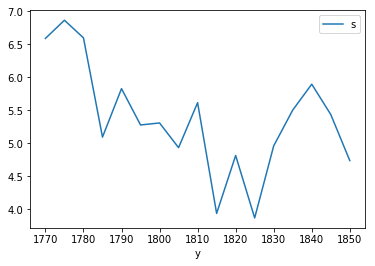

In [103]:
d.plot(x="y",y="s")

In [31]:
os.chdir('D:/Rampen/models/periods')
model = KeyedVectors.load('model-1780-1809.w2v')
os.chdir('D:/Rampen/text')
dm = CWS(1830,"rampen")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


166
created list with 166 words


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


groote, land, gemeente onlangs zóó daarvan, vau mogten schier paal perk midden antwerpen, waaronder 1816 stad werken zware brussel jaren • grooce
rijk, meermalen gewesten, nederlanders ondervinding bijzondere grootere, tijden middel algemeene, landgenooten provinciën onderlinge middelen wijze onderscheiden menschlievende menschlievendheid politieke aanvoerders bewoners bijzonder
— hart, mijne, lotgevallen lieve, riep treurige god neef troost, landman levens haren verlies bloedend betreuren gaarne
behoeden, redden vermogen, bedroeven verliezen onmogelijk kennen lenigen, beklagen vinden bedreigen weten verhoeden zorgen treffen afwenden hernieuwen beletten onttrekken vreedzame hopen
rampen, vaderland, „, tallooze ongelukkige, rust
vele, hec, hetzelve oorlog, bezocht, onderscheidene einde waardoor komen eindelijk


In [16]:
ClusterWord(matrix=dm,k=6)

{'rampen': 4,
 'land': 3,
 'maas': 3,
 'hebhen': 5,
 'rijk': 2,
 'hetzelve': 2,
 'bedreigden': 2,
 'waaronder': 3,
 'gemeente': 5,
 'gedeelte': 3,
 'vaderland': 4,
 'nederlanders': 4,
 'meermalen': 4,
 'riep': 1,
 'treurige': 1,
 'lotgevallen': 1,
 '1816': 3,
 '—': 1,
 'vau': 5,
 'vele': 2,
 'landgenooten': 4,
 '1': 3,
 'ondervinding': 4,
 'tier': 5,
 'ellende': 4,
 'gewikkeld': 2,
 'leerde': 3,
 'bijzondere': 4,
 'stad': 3,
 'behoeden': 0,
 'waarmede': 2,
 'onlangs': 5,
 'gewesten': 2,
 'tallooze': 4,
 'bezocht': 2,
 'onderscheidene': 2,
 'provinciën': 2,
 'werken': 3,
 'hart': 1,
 'getroffen': 1,
 'mogten': 5,
 'oorlog': 2,
 'laatste': 5,
 'gaat': 2,
 'alzoo': 5,
 'oorzaak': 4,
 'zóó': 3,
 'zware': 3,
 'vergoten': 2,
 'frankrijk': 2,
 'grootere': 2,
 'schier': 5,
 'burger': 5,
 'bewaard': 2,
 'beklagen': 0,
 'onderlinge': 4,
 'tijden': 4,
 'brussel': 5,
 'vinden': 0,
 'ooi': 2,
 'hetwelk': 2,
 'europa': 2,
 'jaren': 3,
 '•': 3,
 'hét': 5,
 'middelen': 4,
 'té': 5,
 'landman': 1,
 'on

In [17]:
kmeans(dm,8)

(array([[ 0.36602855,  0.07836516, -0.05403365, ...,  0.1249461 ,
          0.02462699,  0.00751708],
        [ 0.37617016,  0.12716975,  0.04898596, ...,  0.13049313,
          0.09348319, -0.0504686 ],
        [ 0.11674593,  0.00504491, -0.02813888, ...,  0.16809221,
          0.02245859, -0.04082085],
        ...,
        [ 0.35017551,  0.1518792 ,  0.01257731, ...,  0.09623839,
          0.16065613,  0.03323279],
        [ 0.54462143,  0.15490394, -0.00689634, ...,  0.13670274,
         -0.01190444,  0.00468075],
        [ 0.10295465,  0.15235763,  0.11128292, ...,  0.00409608,
          0.0115662 , -0.01984337]]), 1.4572571131626437)